Sentimental Analysis

In [71]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk

In [72]:
df =  pd.read_csv(r'C:\Users\PRATIK KOTKAR\Desktop\Sentimental_Churn\sentiment.tsv',delimiter='\t',names= ['class','tweet'])

In [73]:
df.head()

,class,tweet
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [74]:
df['class'].replace('pos',0, inplace=True)
df['class'].replace('neg',1, inplace=True)

In [75]:
df.head()

,class,tweet
0,1,"@jamielewislewis i cant believe it, it really ..."
1,0,having a vodka tonic and looking forward to go...
2,0,@ddlovatofans1neg1 Could you follow me please....
3,0,@jordanknight for once.................. PLEAS...
4,1,Had a dream about a walk in fast food resturau...


In [76]:
pd.value_counts(df['class'])

0    1016
1     985
Name: class, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xTrain, xTest, yTrain, yTest = train_test_split(df,df['class'], test_size = 0.2, random_state = 0)

In [79]:
print(xTrain.shape,xTest.shape,yTrain.shape,yTest.shape)

(1600, 2) (401, 2) (1600,) (401,)


In [80]:
combi = xTrain.append(xTest, ignore_index=True)
combi.shape

(2001, 2)

In [81]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [82]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,class,tweet,tidy_tweet
0,0,@ngoskillz When I'm up in that neck of the woo...,"When I'm up in that neck of the woods, it'll ..."
1,1,"You know, I shouldn't have to educate the Dutc...","You know, I shouldn't have to educate the Dutc..."
2,1,i bought the sims 3!! when i went to install i...,i bought the sims 3!! when i went to install i...
3,0,watching chelsea lately w/ aunty mindy&amp; ta...,watching chelsea lately w/ aunty mindy&amp; ta...
4,0,"Woohoo! Ok, this time I really did figure out ...","Woohoo! Ok, this time I really did figure out ..."


In [83]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

,class,tweet,tidy_tweet
0,0,@ngoskillz When I'm up in that neck of the woo...,When I m up in that neck of the woods it ll ...
1,1,"You know, I shouldn't have to educate the Dutc...",You know I shouldn t have to educate the Dutc...
2,1,i bought the sims 3!! when i went to install i...,i bought the sims when i went to install i...
3,0,watching chelsea lately w/ aunty mindy&amp; ta...,watching chelsea lately w aunty mindy amp ta...
4,0,"Woohoo! Ok, this time I really did figure out ...",Woohoo Ok this time I really did figure out ...


In [84]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,class,tweet,tidy_tweet
0,0,@ngoskillz When I'm up in that neck of the woo...,When that neck woods definitely business
1,1,"You know, I shouldn't have to educate the Dutc...",know shouldn have educate Dutch Lethal Weapon ...
2,1,i bought the sims 3!! when i went to install i...,bought sims when went install video card compa...
3,0,watching chelsea lately w/ aunty mindy&amp; ta...,watching chelsea lately aunty mindy talking ba...
4,0,"Woohoo! Ok, this time I really did figure out ...",Woohoo this time really figure Thickbox articl...


In [85]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [86]:
tokenized_tweet.head()


0      [When, that, neck, woods, definitely, business]
1    [know, shouldn, have, educate, Dutch, Lethal, ...
2    [bought, sims, when, went, install, video, car...
3    [watching, chelsea, lately, aunty, mindy, talk...
4    [Woohoo, this, time, really, figure, Thickbox,...
Name: tidy_tweet, dtype: object

In [87]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [88]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

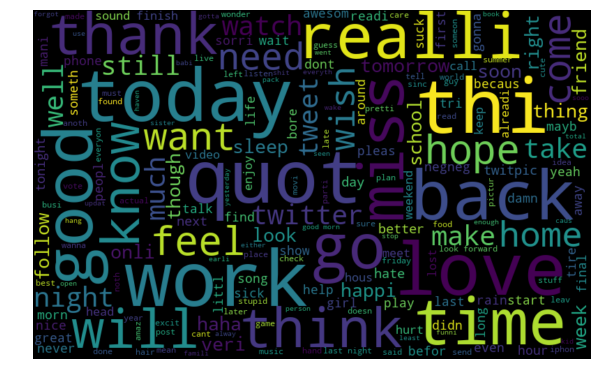

In [89]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

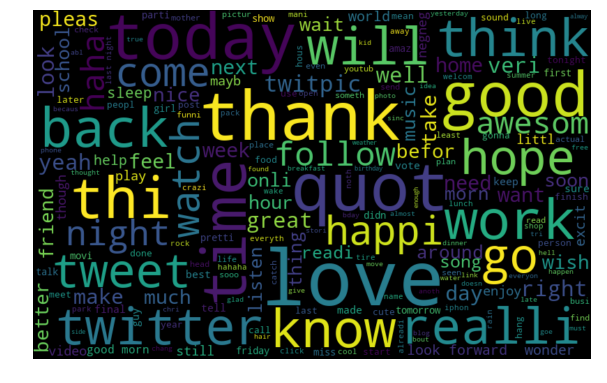

In [90]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

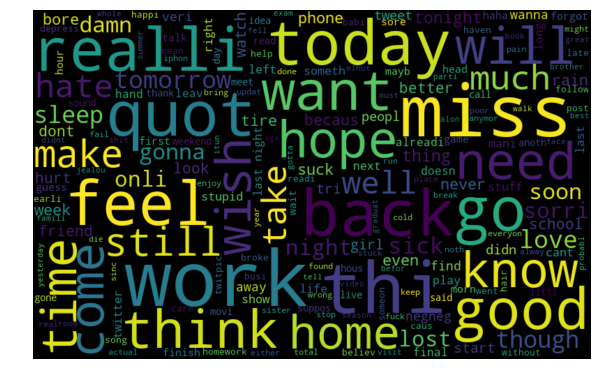

In [91]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [92]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [93]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['class'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['class'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

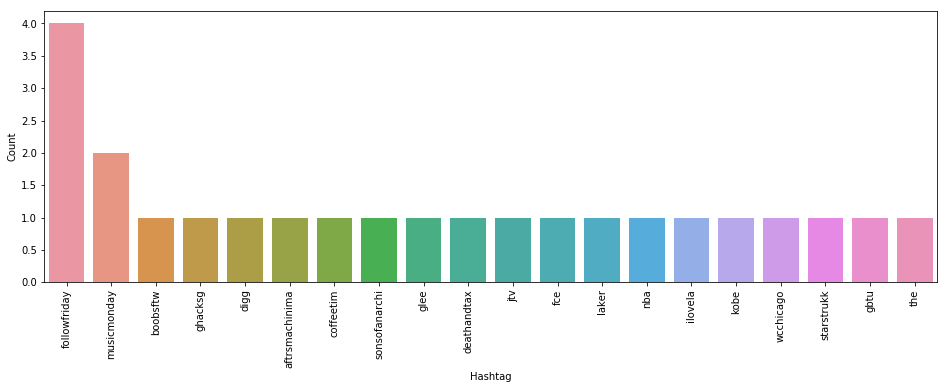

In [94]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.xticks(rotation='vertical')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

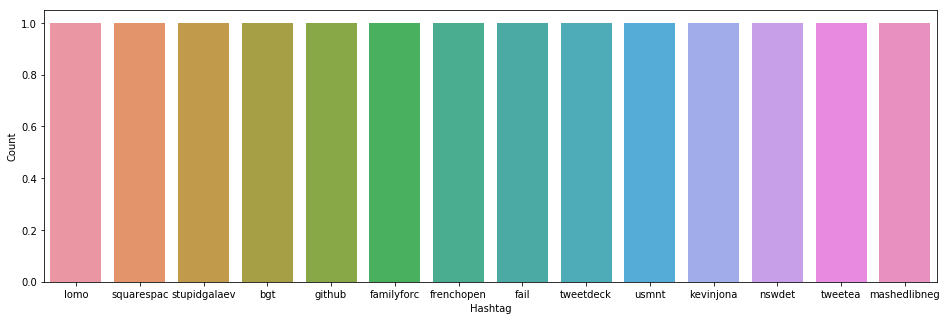

In [95]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [97]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(2001, 1000)

In [98]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(2001, 1000)

In [99]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


(191334, 272480)

In [100]:
model_w2v.wv.most_similar(positive="love")

[('thank', 0.9815449714660645),
 ('count', 0.978888213634491),
 ('cute', 0.9783764481544495),
 ('haha', 0.9779117107391357),
 ('star', 0.9773422479629517),
 ('cool', 0.9771310091018677),
 ('welcom', 0.9768751859664917),
 ('great', 0.9765819311141968),
 ('tini', 0.9765374660491943),
 ('person', 0.9764617085456848)]

In [101]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [102]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(2001, 200)

In [103]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [104]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [105]:
labeled_tweets = add_label(tokenized_tweet)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [106]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'that', 'neck', 'wood', 'definit', 'busi'], tags=['tweet_0']),
 LabeledSentence(words=['know', 'shouldn', 'have', 'educ', 'dutch', 'lethal', 'weapon', 'just', 'joke'], tags=['tweet_1']),
 LabeledSentence(words=['bought', 'sim', 'when', 'went', 'instal', 'video', 'card', 'compat', 'have', 'nvidia', 'geforc', 'negneg', 'negneg'], tags=['tweet_2']),
 LabeledSentence(words=['watch', 'chelsea', 'late', 'aunti', 'mindi', 'talk', 'babyy', 'toni'], tags=['tweet_3']),
 LabeledSentence(words=['woohoo', 'thi', 'time', 'realli', 'figur', 'thickbox', 'articl', 'page', 'should', 'easier', 'view'], tags=['tweet_4']),
 LabeledSentence(words=['commun', 'everyth'], tags=['tweet_5'])]

In [107]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
100%|██████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 516480.14it/s]


In [108]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [109]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(2001, 200)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [111]:
train_bow = bow[:1600,:]
test_bow = bow[1600:,:]


xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,yTrain,
                                                          random_state=42, 
                                                          test_size=0.3)


In [112]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6733001658374793

In [113]:
# test_pred = lreg.predict_proba(test_bow)
# test_pred_int = test_pred[:,1] >= 0.3
# test_pred_int = test_pred_int.astype(np.int)
# test['class'] = test_pred_int
# submission = test[['class']]
# submission.to_csv('sub_lreg_bow.csv', index=False)

In [117]:
yvalid.index

Int64Index([ 320,  524, 1271,  192, 1972,  244, 1912, 1002, 1222, 1170,
            ...
            1139,  584,  599,  873,  830, 1418,  705, 1411,  184,  804],
           dtype='int64', length=480)

In [120]:
train_tfidf = tfidf[:3196,:]
test_tfidf = tfidf[3196:,:]

xtrain_tfidf = train_tfidf[yTrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, yTrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6588921282798833

In [126]:
train_w2v = wordvec_df.iloc[:2000,:]
test_w2v = wordvec_df.iloc[2000:,:]

xtrain_w2v = train_w2v.iloc[yTrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, yTrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6402266288951842

In [127]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6402266288951842

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(xtrain_d2v,ytrain)
predictions = model.predict(xvalid_w2v)
from sklearn.metrics import accuracy_score
print(accuracy_score(yvalid,predictions))